In [4]:
import h5py
import matplotlib.pyplot as plt
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import dataprep

In [3]:
hdf5 = h5py.File('dataplot_300.hdf5', 'r')

In [9]:
x_data = list(hdf5['300C/25s/wavenumber'])
y_data = list(hdf5['300C/25s/counts'])

In [10]:
peaks = spectrafit.peak_detect(x_data, y_data)[0]

In [11]:
mod, pars = spectrafit.set_params(peaks)

In [12]:
out = spectrafit.model_fit(x_data, y_data, mod, pars)

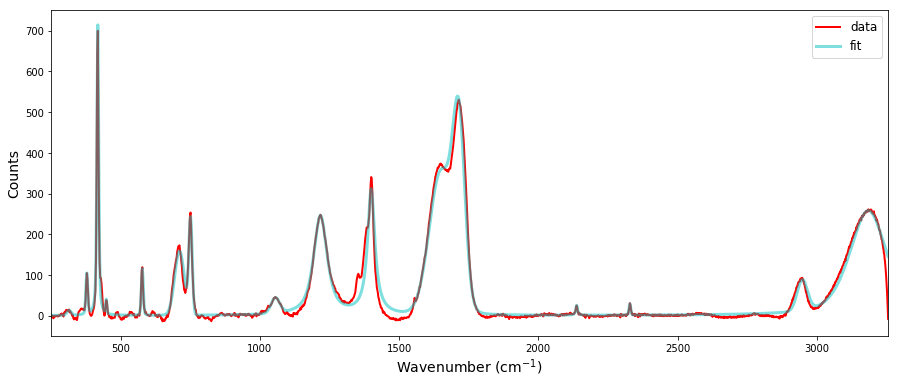

/Users/Parker1/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [40]:
spectrafit.plot_fit(x_data, y_data, out)

In [14]:
y_fit = out.best_fit

In [15]:
residuals = y_fit - y_data

(-153.55700858116543, 153.55700858116543)

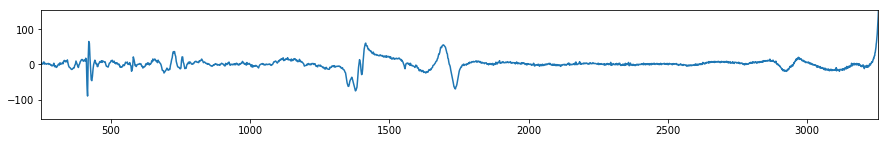

In [38]:
fig = plt.figure(figsize=(15,2))
ax = fig.add_subplot()
plt.plot(x_data, residuals)
plt.xlim(min(x_data), max(x_data))
ylim = max(abs(min(residuals)), abs(max(residuals)))
plt.ylim(-ylim, ylim)


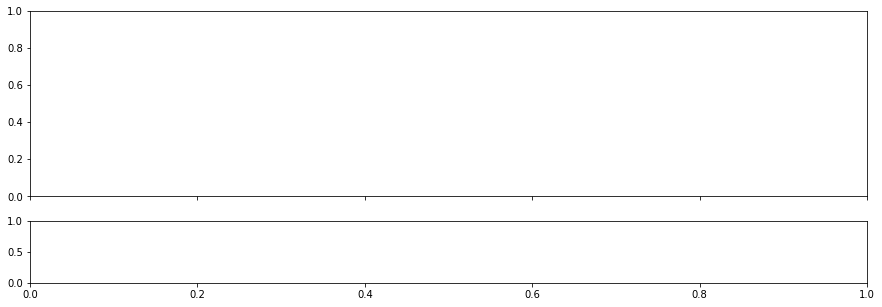

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]},
                               figsize=(15,5))

In [74]:
def plot_fit(hdf5_filename, key, color='blue'):
    """
    This function produces a graph of a spectra contained within an hdf5 file along with labels
    showing the center location of each pseudo-Voigt profile and their corresponding dataset key.

    Args:
        hdf5_filename (str): the filename and location of an existing hdf5 file containing the
                             spectra of interest.
        key (str): the hdf5 key which contains the datasets describing the existing fit and the
                   raw spectra data.

    Returns:
        fig (matplotlib.figure.Figure): Returns the figure so that the plot can be customized
                                        as needed.
        ax (matplotlib.axes._axes.Axes): Returns the figure axes so that the plot can be
                                         customized as needed.
    """
    # handling input errors
    if not isinstance(hdf5_filename, str):
        raise TypeError('Passed value of `hdf5_filename` is not a string! Instead, it is: '
                        + str(type(hdf5_filename)))
    if not hdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError('`hdf5_filename` is not type = .hdf5! Instead, it is: '
                        + hdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(key, str):
        raise TypeError('Passed value of `key` is not a string! Instead, it is: '
                        + str(type(key)))
    # open .hdf5
    hdf5 = h5py.File(hdf5_filename, 'r')
    # extract spectra data
    x_data = list(hdf5['{}/wavenumber'.format(key)])
    y_data = list(hdf5['{}/counts'.format(key)])
    residuals = list(hdf5['{}/residuals'.format(key)])
    # extract fitted peak center values
    peak_centers = []
    peak_labels = []
    for _, peak in enumerate(list(hdf5[key])[:-2]):
        peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])
        peak_labels.append(peak)
    # plot spectra and peak labels
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]},
                               figsize=(15,6))
    # plot data
    ax1.plot(x_data, y_data, color='blue')
    ax2.plot(x_data, residuals, color='teal')
    lineid_plot.plot_line_ids(x_data, y_data, peak_centers, peak_labels,
                              box_axes_space=0.12, plot_kwargs={'linewidth':0.75}, ax=ax1)
    # fig.set_size_inches(15, 5)
    # lock the scale so that additional plots do not warp the labels
    ax1.set_autoscale_on(False)
    # plot labels
    ax2.set_xlabel('Wavenumber ($cm^{-1}$)', fontsize=14)
    ax1.set_xlim(min(x_data), max(x_data))
    ax1.set_ylabel('Counts', fontsize=14, labelpad=20)
    ax2.set_ylabel('Residuals', fontsize=14, labelpad=12)
    # scale residuals plot symmetrically about zero
    ylim = max(abs(min(residuals)), abs(max(residuals)))
    ax2.set_ylim(-ylim, ylim)
    # add grid lines to residual plot
    ax2.grid(which='major', axis='y', linestyle='-')
    # force tick labels for top plot
    ax1.tick_params(axis='both', which='both', labelsize=10, labelbottom=True)
    # add title
    plt.title('{} spectra from {}'.format(key, hdf5_filename.split('/')[-1]), fontsize=18, pad=350)
    hdf5.close()
    return fig, ax1, ax2

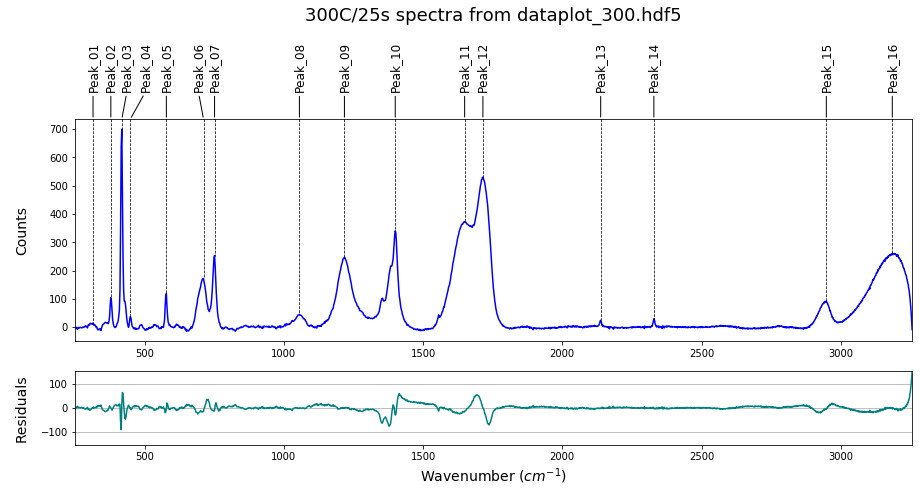

In [75]:
hdf5_filename = 'dataplot_300.hdf5'
key = '300C/25s'

plot_fit(hdf5_filename, key)